# DS 9. piece-wise linear regression, logistic regression

> "작성완료"

- toc: true
- branch: master
- badges: true
- comments: true
- [python, Data Science]

---
# Data Science
- lenture: Data Science_7nd week of lectures.
- lenture date: 2022-04-18
- lecturer: Guebin choi
- study date: 2022-04-18, 2022-04-19, 2022-04-20
- author: Kione kim
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

## piece-wise linear regression 

model: $y_i=\begin{cases} x_i +0.3\epsilon_i & x\leq 0 \\ 3.5x_i +0.3\epsilon_i & x>0 \end{cases}$ 

`-` 데이터선언

In [4]:
np.random.seed(43052)
N=100
x=np.linspace(-1,1,N)
lamb = lambda x: x*1 + np.random.normal()*0.3 if x<0 else 3.5*x + np.random.normal()*0.3 # 익명함수 선언
y=np.array(list(map(lamb,x))) # x를 map에 태운 것을 리스트화한 후 넘파이화

In [5]:
np.array(list(map(lamb,x)))

array([-1.07508185, -1.45393362, -0.92587137, -1.65465433, -0.68357759,
       -0.44795211, -1.04089147, -0.9451566 , -0.64236906, -0.68194158,
       -0.97006301, -0.56846886, -0.47960847, -0.27490805, -1.11748165,
       -0.62594146, -1.05895293, -0.42775975,  0.09871892, -0.38122017,
       -0.64110783, -0.81110081, -0.77262992, -0.47237888, -0.45230881,
       -0.41427133, -0.47212063, -0.09312426, -0.5987789 , -0.30425765,
       -0.35205557, -0.53776667, -0.5239827 , -0.12844604, -0.10754096,
        0.07443622, -0.16070797,  0.28303636, -0.36727383,  0.03727308,
       -0.52759693, -0.34567739, -0.2452446 , -0.18837552,  0.35137288,
        0.17547399, -0.01199547,  0.30490256, -0.29875805,  0.15562258,
       -0.04666269, -0.18290691,  0.20861953,  0.46460247,  0.38357872,
        0.44709558,  0.25289897,  0.42480214,  0.89828999,  1.03536122,
        0.55973461,  0.82289601,  0.31861166,  0.69628553,  1.19107894,
        1.12724772,  0.66818061,  0.94780463,  1.87760928,  2.16

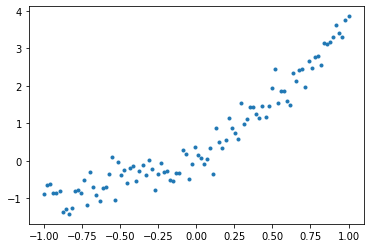

In [6]:
plt.plot(x,y,'.')

`-` 문제정의: 위의 점(given data)들을 잘 추정하는 회귀선을 그려보자.

가정: 위의 모델을 모른다고 가정

### 풀이1: 단순회귀모형

`-` 데이터정리

In [6]:
x=x.reshape(N,1)
y=y.reshape(N,1)

`-` keras를 이용

In [8]:
net=tf.keras.Sequential()

In [208]:
net.add(tf.keras.layers.Dense(1))

In [209]:
net.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')

In [210]:
net.fit(x,y,batch_size=N,epochs=1000,verbose=0)

- 여기서 현재 x,y는 넘파이 array임에도 잘 돌아간다. 즉 텐서형태로 만들지 않아도 괜찮다

In [211]:
net.weights

[<tf.Variable 'dense_10/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.2616348]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32, numpy=array([0.6069048], dtype=float32)>]

- $β_0$는0.6770327이고 $β_1$는 2.191313이기 때문에 

In [212]:
yhat= x*2.191313+0.6770327

`-` 다음과 같은 방법으로도 yhat을 구할 수 있다.

In [213]:
yhat= net.predict(x)

- 이 방법이 훨씬 편리하다!

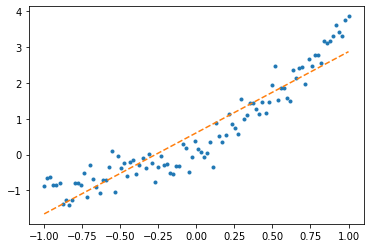

In [214]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'--')

- 음,, 잘 추정되지 않았음..!
- 이는 단순선형회귀모형으로 추정했기 때문입..
- epoc을 아주 많이 늘린다고 하더라도 이 방법을 통해서는 잘 추정될 수 없다.
- 이는 아키텍처 설계 자체가 잘못되었기 때문이다. 
- 꺾인 부분을 포현하기에는 아키텍처의 표현력이 매우 부족하다 -> `under fit`
- 다른 방법을 통해서 접근해보자!

### 풀이2: 비선형 활성화함수 도입

`-` 여기에서 도입할 비선형 활성화 함수는 `relu`, 다른 것도 있음 

`-` 네트워크 수정 

수정전(hat 생략)

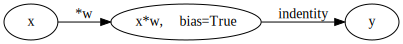

In [215]:
#collapse
gv('''
"x" -> "x*w,    bias=True"[label="*w"] ;
"x*w,    bias=True" -> "y"[label="indentity"] ''')


수정후(hat 생략)

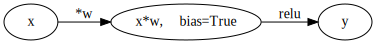

In [216]:
#collapse
gv('''
"x" -> "x*w,    bias=True"[label="*w"] ;
"x*w,    bias=True" -> "y"[label="relu"] ''')


- 지금까지 $f(x)=x$ 라는 항등함수를 사용했는데, 이제 항등함수대신 `relu`라는 비선형활성화함수를 사용하는 것으로 구조를 살짝 변경 
- 즉, 활성화함수(acitivation function)를 indentity(항등)에서 relu로 변경 

`relu` 함수란?

In [217]:
_x=tf.linspace(-1,1,100)
tf.nn.relu(_x)

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01010101, 0.03030303, 0.05050505, 0.07070707, 0.09090909,
       0.11111111, 0.13131313, 0.15151515, 0.17171717, 0.19191919,
       0.21212121, 0.23232323, 0.25252525, 0.27272727, 0.29292929,
       0.31313131, 0.33333333, 0.35353535, 0.37373737, 0.39393939,
       0.41414

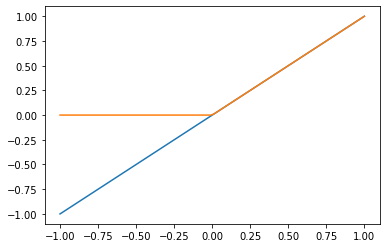

In [218]:
plt.plot(_x,_x)
plt.plot(_x,tf.nn.relu(_x))

- 입력: 파란선
- 출력: 주황선
: 파란선에서 주황선으로 바꿔주는 것이 `relu`함수임
- `relu` : $f(x)=\max(0,x)=\begin{cases} 0 & x\leq 0 \\ x & x>0 \end{cases}$

`-` 아키텍처 수정:

$\hat{y}_i=f(\hat{w}_0+\hat{w}_1x_i)$, $f(x) = x$

-> $\hat{y}_i=relu(\hat{w}_0+\hat{w}_1x_i)$, $relu(x)=\max(0,x)$

`-` 풀이

**step 1** : net

In [180]:
net2 = tf.keras.Sequential()

**step 2**: layer

In [181]:
tf.random.set_seed(43053)
l1 = tf.keras.layers.Dense(1,input_shape=(1,)) # layer를 l1으로 입력
a1 = tf.keras.layers.Activation(tf.nn.relu) # activatind function을 a1으로 입력

- tf.random.set_seed(50000)를 설정하는 이유는 시드를 설정하지 않으면 초기값이 바뀌기 때문이다 -> 초기값을 고정하기 위함

In [182]:
net2.add(l1)

In [183]:
net2.layers

- 현재 layer에 하나가 들어와있는데, l1인 것 같음

In [184]:
net2.layers[0]

In [185]:
id(net2.layers[0])

1744869290912

In [186]:
id(l1)

1744869290912

- l1이 맞음!

In [187]:
net2.add(a1)

In [188]:
net2.layers

- 하나가 더 추가되었는데 이는 a1이다

In [189]:
l1.get_weights

<bound method Layer.get_weights of <keras.layers.core.dense.Dense object at 0x00000196425073A0>>

In [190]:
a1.get_weights

<bound method Layer.get_weights of <keras.layers.core.activation.Activation object at 0x0000019640A7A5B0>>

- l1의 weights와 a1의 weights가 같다.
- a1이 활성화함수로 학습할 파라메터가 없다.
- l1의 weights가 a1의 weights에 그대로 들어간 것! 

In [191]:
x.shape

TensorShape([2000, 1])

In [192]:
l1.weights

[<tf.Variable 'dense_25/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.41721308]], dtype=float32)>,
 <tf.Variable 'dense_25/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [193]:
u1= x @ l1.weights[0] + l1.weights[1]

- u1은 `relu`함수를 취해주기 전의 상태이다

`-` 이는 다음과 같은 방법으로도 구할 수 있다.

In [194]:
u1 = l1(x)

- u1= x가 layer를 거쳐 나온 값, relu를 취해주긴 전의 상태

In [195]:
v1=tf.nn.relu(u1)

- u1에 `relu`를 취해주면 yhat이 된다. 이를 `v1`으로 입력

`-` v1(yhat)을 다음과 같이 구할 수도 있다

In [196]:
v1=a1(u1)

- v1= u1이 relu를 타고 나온 값, yhat

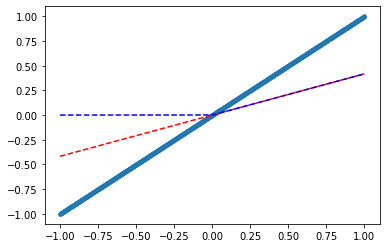

In [197]:
plt.plot(x,x,'.')
plt.plot(x,u1,'--r')
plt.plot(x,v1,'--b')

- u1에서 0보다 작은 부분이 그대로 그려졌지만, v1에선 0으로 꺾여서 그려졌다! 

**step 3**: compile

In [198]:
net2.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')

**step 4**: fit

In [292]:
net2.fit(x,y,epochs=1000,verbose=0,batch_size=N)

`-` 결과

In [199]:
yhat= tf.nn.relu(x@l1.weights[0]+l1.weights[1])
yhat= net2.predict(x)
yhat= net2(x)
yhat= a1(l1(x))
yhat= net2.layers[1](net2.layers[0](x))

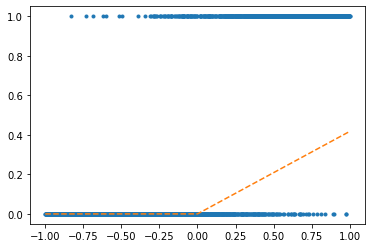

In [200]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'--')

- 음.. 0보다 큰 값은 잘 적합한 것 같은데, 0보다 작은 값은 적합이 안 된 것 같은데...?
- relu가 0보다 작은 값을 0으로 보내주는 것이기 때문에 0보다 작은 값에 대해선 적합이 안 됨
- epoc을 늘린다고 하더라도 적합이 안 될 것임 -> 모양의 표현력이 떨어짐

- 지금의 선은 양수인 값을 적합하고 선을 하나 추가하여 음수인 값을 적합하도록 조합할 수 없을까?

### 풀이3: 노드수추가 + layer(층) 추가

**1단계** : net

In [201]:
net3=tf.keras.Sequential()

**2단계** : layer

In [202]:
tf.random.set_seed(43053)
l1=tf.keras.layers.Dense(2,input_shape=(1,))
a1=tf.keras.layers.Activation(tf.nn.relu)

- `tf.keras.layers.Dense(2,input_shape=(1,))`에서 출력을 2로 하면 두 개의 직선이 만들어진다.

In [203]:
net3.add(l1)
net3.add(a1)

In [204]:
net3.layers

- l1, a1이 들어가있음

`-` 네트워크 상황 확인

In [205]:
l1(x).shape

TensorShape([2000, 2])

- x가 l1를 통과하면, 전 풀이와 다르게 shape이 (100,2)가 나온다.
- 이는 출력차원을 2로 설정했기 때문

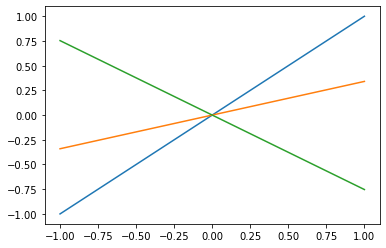

In [206]:
plt.plot(x,x)
plt.plot(x,l1(x))

- 직선이 두 개 그려져있다!

`-` 여기에 `relu`를 취해서 그려보자!

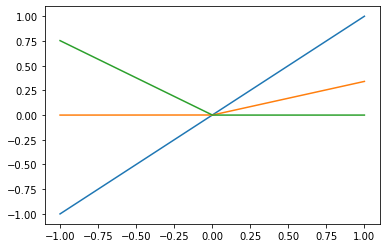

In [207]:
plt.plot(x,x)
plt.plot(x,a1(l1(x)))

- .. 음? 두 가지의 문제가 있음
1. 차원이 맞지 않는다. 현재 a1(l1(x))의 차원은 (N,2)인데, 최종적인 yhat의 차원은 (N,1)임
2. 차원을 맞춘다 하더라도(?), relu를 통과하면 yhat은 항상 > 0 이다. 따라서 음수값을 갖는 y는 0으로 맞춰질 수 밖에 없음

`-` 해결책: a1(l1(x))에 연속으로(sequantial하게!) 또 다른 layer를 설계해서 (N,2) -> (N,1)로 만들어준다.
- `yhat= bias+ weights1 * a1(l1(x))[0] +  weights2 * a1(l1(x))[1]`

`-` 즉 a1(l1(x)) 를 새로운 입력으로 해석하고 출력을 만들어주는 선형모형을 다시태우면 된다. 
- $yhat = bias + \beta_1 * x_1 +  \beta_2 * x_2$ 에서 $x$처럼
- 입력차원: 2 
- 출력차원: 1 

In [208]:
net3.layers

`-` 입력차원이 2, 출력차원이 1인 layer 추가

In [209]:
tf.random.set_seed(43053)
l2= tf.keras.layers.Dense(1,input_shape=(2,)) # 입력차원이 2, 출력차원이 1

In [210]:
net3.add(l2)

In [211]:
net3.layers

- layer가 총 3개 들어가있음

In [212]:
l1.weights

[<tf.Variable 'dense_26/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [213]:
l2.weights

[<tf.Variable 'dense_27/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [214]:
net3.weights

[<tf.Variable 'dense_26/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_27/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

- l1과 l2의 weights를 합치면 net3.weights이다.

In [215]:
net3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 2)                 4         
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
 dense_27 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


- net3는 dense layer, activation layer, dense layer의 순으로 구성되어 있다.
- Param는 추정해야할 파라메터의 수인데, 4 + 3 = 7개로 나왔다.

`-` 수식표현: $X \to X@W^{(1)}+b^{(1)}$(첫번째 선형변환)$ \to relu(X@W^{(1)}+b^{(1)})$(비선형변환)$\to relu(X@W^{(1)}+b^{(1)})@W^{(2)}+b^{(2)}$(두번째 선형변환)$=yhat$

- $X$: (N,1) 
- $W^{(1)}$: (1,2) ==> 파라메터 2개 추정 
- $b^{(1)}$: (2,) ==> 파라메터 2개가 추가 // 여기까지 추정할 파라메터는 4개 
- $W^{(2)}$: (2,1) ==> 파라메터 2개 추정 
- $b^{(2)}$: (1,) ==> 파라메터 1개가 추가 // 따라서 3개

`-` cf. 추정할 파라메터수가 많다 -> 복잡한 모형이다. 
- 초거대AI: 추정할 파라메터수가 엄청 많은 모형이다.

In [216]:
net3.weights

[<tf.Variable 'dense_26/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_27/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [217]:
l1.weights

[<tf.Variable 'dense_26/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [218]:
l2.weights

[<tf.Variable 'dense_27/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

`-` 좀 더 간단한 수식표현: $X \to (u_1 \to v_1) \to (u_2 \to v_2) = yhat$
- $u_1= X@W^{(1)}+b^{(1)}$
- $v_1= relu(u_1)$
- $u_2= v_1@W^{(2)}+b^{(2)}$
- $v_2= indentity(u_2):=yhat$

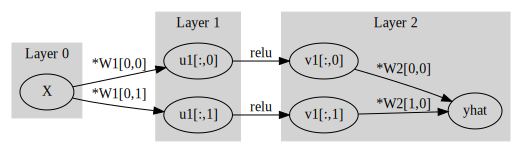

In [219]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "u1[:,0]"[label="*W1[0,0]"]
    "X" -> "u1[:,1]"[label="*W1[0,1]"]
    "u1[:,0]" -> "v1[:,0]"[label="relu"]
    "u1[:,1]" -> "v1[:,1]"[label="relu"]
    label = "Layer 1"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "v1[:,0]" -> "yhat"[label="*W2[0,0]"]
    "v1[:,1]" -> "yhat"[label="*W2[1,0]"]
    label = "Layer 2"
}
''')


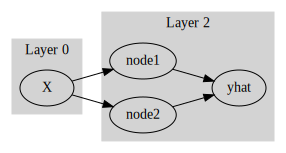

In [220]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "node1"
    "X" -> "node2"
    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "yhat"
    "node2" -> "yhat"
    label = "Layer 2"
}
''')

**3단계** : compile

In [221]:
net3.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='mse')

**4단계** : fit

In [31]:
net3.fit(x,y,epochs=1000,verbose=0,batch_size=N)

`-` 결과확인

In [222]:
net3.weights

[<tf.Variable 'dense_26/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.34065306, -0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_26/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_27/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

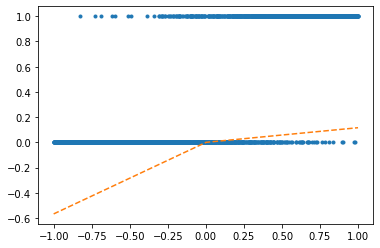

In [223]:
plt.plot(x,y,'.')
plt.plot(x,net3(x),'--')

- 잘 맞춰졌다!

`-` 분석

`-` 선형변환: w(o)

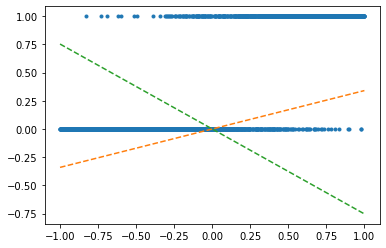

In [224]:
plt.plot(x,y,'.')
plt.plot(x,l1(x),'--')

`-` relu

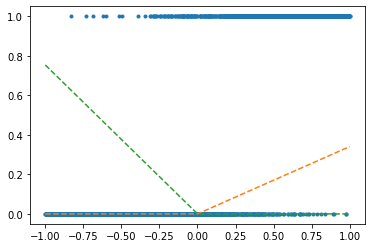

In [225]:
plt.plot(x,y,'.')
plt.plot(x,a1(l1(x)),'--')

`-` 선형변환: w(1)

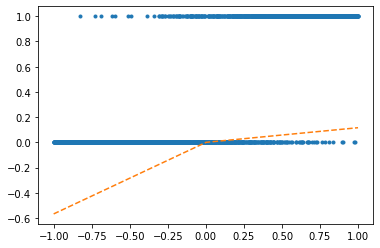

In [226]:
plt.plot(x,y,'.')
plt.plot(x,l2(a1(l1(x))),'--')

`-` 마지막 2개의 그림 분석 

In [227]:
l2.weights

[<tf.Variable 'dense_27/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.34065306],
        [-0.7533803 ]], dtype=float32)>,
 <tf.Variable 'dense_27/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

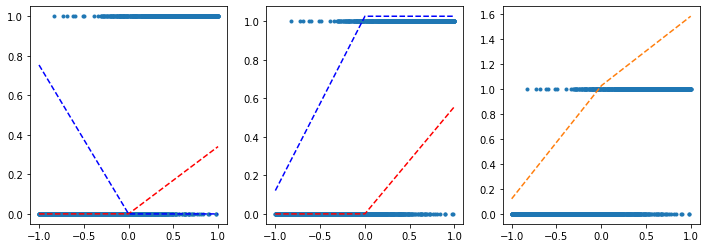

In [228]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3) 
fig.set_figwidth(12) 

# ax1: relu 취해준 것
ax1.plot(x,y,'.')
ax1.plot(x,a1(l1(x))[:,0],'--r')
ax1.plot(x,a1(l1(x))[:,1],'--b')

# ax2: 두번째 선형함수 취해준 것(두 직선 더하기 전)
ax2.plot(x,y,'.')
ax2.plot(x,a1(l1(x))[:,0]*1.6328746,'--r')
ax2.plot(x,a1(l1(x))[:,1]*(-1.2001747)+1.0253307,'--b')

# ax3: 두 직선을 합한 것 -> yhat
ax3.plot(x,y,'.')
ax3.plot(x,a1(l1(x))[:,0]*1.6328746+a1(l1(x))[:,1]*(-1.2001747)+1.0253307,'--')

### 풀이3의 실패

In [229]:
tf.random.set_seed(43054)
# 1
net3=tf.keras.Sequential()
# 2
net3.add(tf.keras.layers.Dense(2))
net3.add(tf.keras.layers.Activation('relu')) # Activation(tf.nn.relu)대신 Activation('relu')로 해도 된다 
net3.add(tf.keras.layers.Dense(1))
# 3
net3.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='mse')
# 4
net3.fit(x,y,epochs=1000,verbose=0,batch_size=N)

In [230]:
yhat=net3(x)

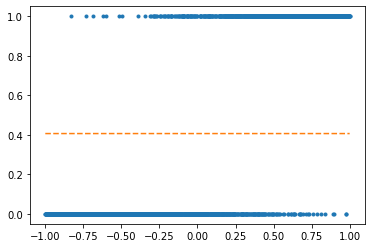

In [231]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'--')

- 뭔가 이상하다..?
- 음수인 경우 더 꺾이는 형태로 적합되어야하는데, 꺾이다 말았음
- 이는 epoc을 늘려도 해결되지 않는다.

`-` 실패분석

In [232]:
l1,a1,l2 = net3.layers

In [233]:
l2.weights

[<tf.Variable 'dense_29/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.6519158 ],
        [-0.06688331]], dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(1,) dtype=float32, numpy=array([0.40650004], dtype=float32)>]

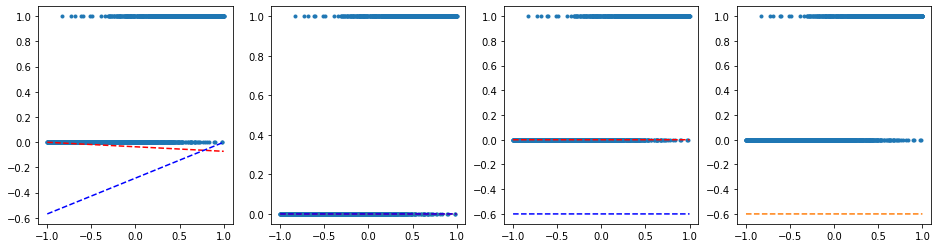

In [234]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4) 
fig.set_figwidth(16) 

# ax1: 첫번째 선형함수 취해준 것
ax1.plot(x,y,'.')
ax1.plot(x,l1(x)[:,0],'--r')
ax1.plot(x,l1(x)[:,1],'--b')

# ax2: relu 취해준 것
ax2.plot(x,y,'.')
ax2.plot(x,a1(l1(x))[:,0],'--r')
ax2.plot(x,a1(l1(x))[:,1],'--b')

# ax3: 두번쨰 선형함수 취해준 것(두 직선 합하기 전)
ax3.plot(x,y,'.')
ax3.plot(x,a1(l1(x))[:,0]*0.65121335,'--r')
ax3.plot(x,a1(l1(x))[:,1]*(1.8592643)+(-0.60076195),'--b')

# ax4: 두 직선 합한 것 -> yhat
ax4.plot(x,y,'.')
ax4.plot(x,a1(l1(x))[:,0]*0.65121335+a1(l1(x))[:,1]*(1.8592643)+(-0.60076195),'--')

- 처음 선형함수 취해준 빨간선이 0임 -> 빨간선이 하는 역할이 없음 
- 그런데 생각해보니 이 상황에서 빨간색선이 할 수 있는 일이 별로 없음 
- 왜냐하면 지금은 나름 파란색선에 의해서 최적화가 된 상태이기 때문 $\to$ 여기서 빨간선이 뭔가 하려 하면 최적화된 상태가 깨질 수 있음 (loss 증가) 
- 즉 이 상황 자체가 나름 최적회된 상태임.
- 이러한 현상을 "`global minimum`을 찾지 못하고 `local minimum`에 빠졌다"라고 한다. 

`-` 확인

In [235]:
net3.weights

[<tf.Variable 'dense_28/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-0.0359407 ,  0.28448898]], dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(2,) dtype=float32, numpy=array([-0.03609665, -0.28448963], dtype=float32)>,
 <tf.Variable 'dense_29/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.6519158 ],
        [-0.06688331]], dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(1,) dtype=float32, numpy=array([0.40650004], dtype=float32)>]

In [236]:
W1= tf.Variable(tnp.array([[-0.03077251,  1.8713338 ]]))
b1= tf.Variable(tnp.array([-0.04834982,  0.3259186 ]))
W2= tf.Variable(tnp.array([[0.65121335],[1.8592643 ]]))
b2= tf.Variable(tnp.array([-0.60076195])) 

In [237]:
with tf.GradientTape() as tape: 
    u = tf.constant(x) @ W1 + b1 
    v = tf.nn.relu(u) 
    yhat = v@W2 + b2 
    loss = tf.losses.mse(y,yhat) 

In [238]:
tape.gradient(loss,[W1,b1,W2,b2])

[<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[   0.        , 2748.15347024]])>,
 <tf.Tensor: shape=(2,), dtype=float64, numpy=array([   0.       , 3387.3532218])>,
 <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[   0.        ],
        [3359.77724964]])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([769.41952615])>]

예상대로 계수값이 거의 다 0이다. -> local minimum에 빠질 수 밖에 없었음..!

### 풀이4: 노드수를 더 추가

`-` 노드수를 더 추가해보면 어떻게 될까? 즉, 선이 더 추가된다면?

In [239]:
# 1
net4 = tf.keras.Sequential()
# 2
net4.add(tf.keras.layers.Dense(512, activation='relu'))
net4.add(tf.keras.layers.Activation('relu'))
net4.add(tf.keras.layers.Dense(1))
# 3
net4.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='mse')
# 4
net4.fit(x,y,epochs=1000,verbose=0,batch_size=N)

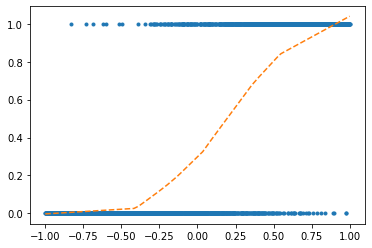

In [240]:
plt.plot(x,y,'.')
plt.plot(x,net4(x),'--')

- 잘 된다.
- 여러번 실행시켜도 잘 된다.(=초기값이 변경되어도)
- 이는 몇 개의 노드가 역할을 잘 못하여도 다른 노드들이 이를 보완해주는 형태임!

`-` 그렇다고 노드 수가 많은 것이 무조건 좋은 것은 아니다. 좋을 때도 많지만 가끔씩은 과적합(overfit) 문제를 발생시킨다.

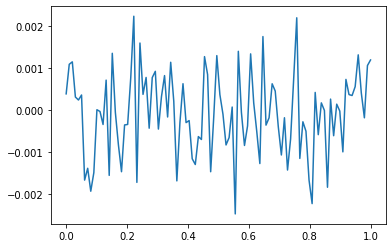

In [241]:
np.random.seed(43052)
N=100
_x=np.linspace(0,1,N).reshape(N,1)
_y=np.random.normal(loc=0,scale=0.001,size=(N,1))
plt.plot(_x,_y)

In [242]:
tf.random.set_seed(43052)
net4=tf.keras.Sequential()
net4.add(tf.keras.layers.Dense(512,activation='relu'))
net4.add(tf.keras.layers.Dense(1))
net4.compile(optimizer=tf.keras.optimizers.SGD(0.5),loss='mse')
net4.fit(_x,_y,epochs=1000,verbose=0,batch_size=N)

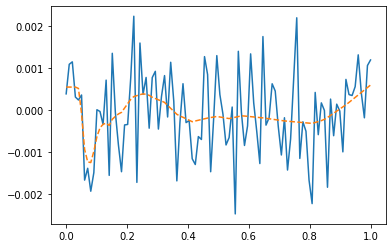

In [243]:
plt.plot(_x,_y)
plt.plot(_x,net4(_x),'--')

- _y값은 정규분포에서 뽑은 것이기 때문에 어떤 추세가 있는 것이 아니다.
- 즉 이를 추정하면 `y=0`의 직선으로 추정하여야 한다. 
- 나머지는 모두 틀린 것임!
- 과적합임!

## Logistic regression

### motive

`-` 현실에서는 이런 경우가 많다. 
- $x$가 커질수록 (혹은 작아질수록) 성공확률이 올라간다. 
- ex) 학점과 취업관계, 온도와 불량률의 관계 등

`-` **암기!!** 이러한 모형은 아래와 같이 설계할 수 있음
- $y_i \sim Ber(\pi_i)$, where $\pi_i=\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

- $\hat{y}_i =\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+exp(-\hat{w}_0-\hat{w}_1x_i)}$

- $loss=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$

: loss를 기존과 같이 mse로 잡지 않고 위와 같은 손실함수인 BCEloss로 설정(BCE는 Binary Cross Entropy의 약자)

### 예제

In [244]:
N = 2000 

In [245]:
x = tnp.linspace(-1,1,N).reshape(N,1)
w0 = -1   # w_0 true 값
w1 = 5   # w_1 true 값
u = w0 + x*w1 # 선형변환
v = tf.constant(np.exp(u)/(1+np.exp(u))) # v= πi 
# v = tf.nn.sigmoid(u) # 같은 코드 
y = tf.constant(np.random.binomial(1,v),dtype=tf.float64)

- v = tf.constant(np.exp(u)/(1+np.exp(u)))
- v를 tf.nn.sigmoid(u)로 구할 수 있음. 편리함.
- tf.constant(np.random.binomial(1,v),dtype=tf.float64): int 형태로 나올 수 있으므로 float으로 설정

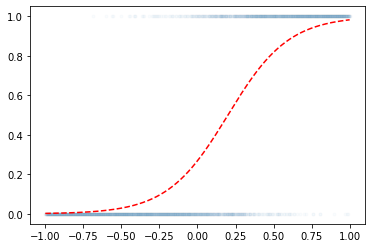

In [246]:
plt.plot(x,y,'.',alpha=0.02)
plt.plot(x,v,'--r')

- v는 확률로 우리가 추정하고자 하는 것(목표)

`-` 표현식

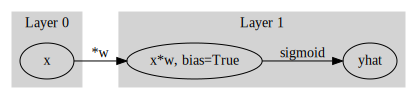

In [247]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x" -> "x*w, bias=True"[label="*w"]
    "x*w, bias=True" -> "yhat"[label="sigmoid"]
    label = "Layer 1"
}
''')

`-` 또는 간단하게 아래와 같이 쓸 수 있다. 

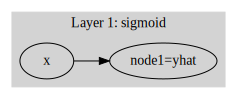

In [248]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    x
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    x -> "node1=yhat"
    label = "Layer 1: sigmoid"
}
''')

- `sigmoid`는 기존 모형에서 `relu`와 같은 역할을 함
- v는 `sigmoid`를 취해준 것 -> 여기서는 $\pi$, $yhat$이 됨
- 결국 앞서 단순선형 + 비선형을 취해준 것과 모형이 같음!

#### 케라스를 이용한 적합

$loss=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$

In [249]:
tf.random.set_seed(43052)
# 1
net=tf.keras.Sequential()
# 2
net.add(tf.keras.layers.Dense(1))
net.add(tf.keras.layers.Activation('sigmoid'))
# net.add(tf.keras.layers.Dense(1, activation='sigmoid') 
# 3
bceloss_fn = lambda y, yhat: -tf.reduce_mean(y*tnp.log(yhat) + (1-y)*tnp.log(1-yhat)) # bceloss를 사용자 정의함수를 통해 설정
net.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss=bceloss_fn)
# 4
net.fit(x,y,epochs=1000,verbose=0,batch_size=N)

In [250]:
net.weights

[<tf.Variable 'dense_34/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.33877]], dtype=float32)>,
 <tf.Variable 'dense_34/bias:0' shape=(1,) dtype=float32, numpy=array([-0.8301144], dtype=float32)>]

- $w_0$ true 값 = -1
- $w_1$ true 값 = 5
- 적합결과 $w_1$는 $4.252$, $w_0$는 $-0.985$이 나왔음.
- 얼추 맞췄음

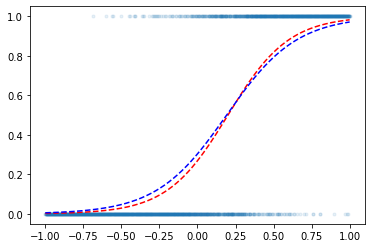

In [251]:
plt.plot(x,y,'.',alpha=0.1)
plt.plot(x,v,'--r') # true
plt.plot(x,net(x),'--b') # 적합

- 시각화도 얼추 맞춘 것으로 나타남

#### BCEloss말고 mse를 사용할 경우

In [252]:
x = tnp.linspace(-1,1,N).reshape(N,1)
w0 = -1 
w1 = 5 
u = w0 + x*w1 
#v = tf.constant(np.exp(u)/(1+np.exp(u))) # v=πi 
v = tf.nn.sigmoid(u) 
y = tf.constant(np.random.binomial(1,v),dtype=tf.float64) 

In [253]:
tf.random.set_seed(43052)
net=tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))
net.add(tf.keras.layers.Activation('sigmoid'))
net.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='mse')
net.fit(x,y,epochs=1000,verbose=0,batch_size=N)

In [254]:
net.weights

[<tf.Variable 'dense_35/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.812898]], dtype=float32)>,
 <tf.Variable 'dense_35/bias:0' shape=(1,) dtype=float32, numpy=array([-0.59697366], dtype=float32)>]

- true값인 5, -1 과 꽤 차이가 있음

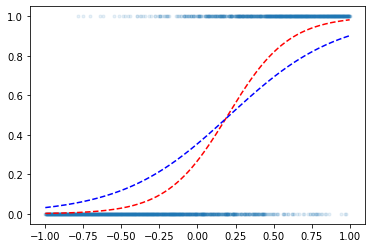

In [255]:
plt.plot(x,y,'.',alpha=0.1)
plt.plot(x,v,'--r')
plt.plot(x,net(x),'--b')

- BCEloss보다 동일 초기값, 동일 epoc에서 적합이 잘 되지 않았음

`-` MSEloss, BCEloss의 시각화

In [256]:
w0, w1 = np.meshgrid(np.arange(-10,3,0.2), np.arange(-1,10,0.2), indexing='ij')
w0, w1 = w0.reshape(-1), w1.reshape(-1)
mseloss_fn = lambda y,yhat: tf.reduce_mean((y-yhat)**2)

def loss_fn1(w0,w1):
    u = w0+w1*x 
    yhat = np.exp(u)/(np.exp(u)+1)
    return mseloss_fn(y,yhat) 

def loss_fn2(w0,w1):
    u = w0+w1*x 
    yhat = np.exp(u)/(np.exp(u)+1)
    return bceloss_fn(y,yhat) 

loss1 = list(map(loss_fn1,w0,w1))
loss2 = list(map(loss_fn2,w0,w1))

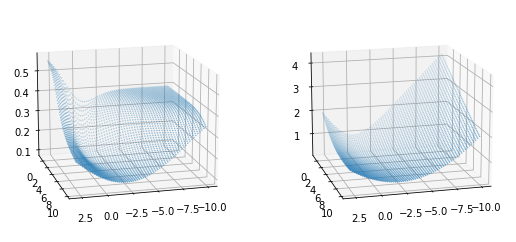

In [257]:
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(9)

ax1=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2,projection='3d')
ax1.elev=15
ax2.elev=15
ax1.azim=75
ax2.azim=75

ax1.scatter(w0,w1,loss1,s=0.1)
ax2.scatter(w0,w1,loss2,s=0.1) 

- 왼쪽곡면(MSEloss)보다 오른쪽곡면(BCEloss)이 좀 더 sharp하게 생김 -> 오른쪽 곡면에서 더 학습이 잘될것 같음 
- 왼쪽곡면에서 평평한 부분에서 초기값이 설정되면 최적의 추정치를 찾는데 시간이 꽤 걸릴 것 같음(오른쪽 곡면보다)

#### 학습과정 시각화

##### 예시1: 옵티마이저 `SGD` 사용

`-` 파라메터학습과정 시각화
- 옵티마이저: SGD
- 초기값: (w0,w1) = (-3.0,-1.0)로 설정

1) 데이터 선언 및정리 

In [258]:
x = tnp.linspace(-1,1,N).reshape(N,1)
w0 = -1 
w1 = 5 
u = w0 + x*w1 
#v = tf.constant(np.exp(u)/(1+np.exp(u))) # v=πi 
v = tf.nn.sigmoid(u) 
y = tf.constant(np.random.binomial(1,v),dtype=tf.float64) 

In [259]:
X = tf.concat([tf.ones(N,dtype=tf.float64).reshape(N,1),x],axis=1)
X

<tf.Tensor: shape=(2000, 2), dtype=float64, numpy=
array([[ 1.       , -1.       ],
       [ 1.       , -0.9989995],
       [ 1.       , -0.997999 ],
       ...,
       [ 1.       ,  0.997999 ],
       [ 1.       ,  0.9989995],
       [ 1.       ,  1.       ]])>

2) 1ter

`-` `mse`

In [260]:
net_mse=tf.keras.Sequential()
net_mse.add(tf.keras.layers.Dense(1,use_bias=False,activation='sigmoid'))
net_mse.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='mse')
net_mse.fit(X,y,epochs=1,batch_size=N)

1/1 [==============================] - 0s 453ms/step - loss: 0.1674


`-` `BCEloss`

In [261]:
net_bce=tf.keras.Sequential()
net_bce.add(tf.keras.layers.Dense(1,use_bias=False,activation='sigmoid'))
net_bce.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss=bceloss_fn)
net_bce.fit(X,y,epochs=1,batch_size=N)

1/1 [==============================] - 1s 504ms/step - loss: 0.8934


In [262]:
net_mse.get_weights(), net_bce.get_weights()

([array([[-0.8384272],
         [ 1.1134921]], dtype=float32)],
 [array([[ 0.66596425],
         [-0.3028879 ]], dtype=float32)])

- 이 값을 (-3.0,-1.0)로 설정할 것임verbose=

3) 초기값 설정

In [263]:
net_mse.set_weights([tnp.array([[0.17481424],[-0.8579534 ]], dtype=tf.float32)])

In [264]:
net_mse.set_weights([tnp.array([[-3.0],[-1.0]], dtype=tf.float32)])
net_bce.set_weights([tnp.array([[-3.0],[-1.0]], dtype=tf.float32)])

In [265]:
net_mse.get_weights(), net_bce.get_weights()

([array([[-3.],
         [-1.]], dtype=float32)],
 [array([[-3.],
         [-1.]], dtype=float32)])

- 초기값 설정 완료

4) 학습과정 기록: epoc 15 마다 기록

In [266]:
What_mse = tnp.array([[-3.0],[-1.0]], dtype=tf.float32)
What_bce = tnp.array([[-3.0],[-1.0]], dtype=tf.float32)

In [267]:
for k in range(29):
    net_mse.fit(X,y,epochs=15,batch_size=N, verbose=0)
    net_bce.fit(X,y,epochs=15,batch_size=N, verbose=0)
    What_mse= tf.concat([What_mse,net_mse.weights[0]],axis=1)
    What_bce= tf.concat([What_bce,net_bce.weights[0]],axis=1)

- epoc 15를 30 번 반복 -> 총 450번의 epoc이라 할 수 있음

`-` `tf.concat([what_mse,net_mse.weights[0]],axis=1)` : 학습과정 기록 코드 
- 15번의 epoc이 끝날 때 마다, weights가 `net_mse.weights[0] or net_mse.get_weights()[0]`에 업데이트 되어 있음
- weights의 개선을 눈으로 보기 위해, 15번의 epoc이 끝난 후의 weights를 벡터로 기록
- 기존의 what_mse에 새로운(업데이트되는) weughts를 옆으로 연결(`concat`)

In [268]:
net_mse.weights[0]

<tf.Variable 'dense_36/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-1.4817262 ],
       [ 0.22155873]], dtype=float32)>

In [269]:
What_mse

<tf.Tensor: shape=(2, 30), dtype=float32, numpy=
array([[-3.        , -2.9749255 , -2.9490163 , -2.9222174 , -2.8944697 ,
        -2.8657093 , -2.8358657 , -2.8048604 , -2.772606  , -2.7390068 ,
        -2.7039557 , -2.667334  , -2.6290085 , -2.5888314 , -2.5466347 ,
        -2.5022306 , -2.4554071 , -2.405927  , -2.3535206 , -2.2978861 ,
        -2.2386847 , -2.1755416 , -2.1080441 , -2.035752  , -1.9582115 ,
        -1.8749907 , -1.7857347 , -1.6902632 , -1.5887127 , -1.4817262 ],
       [-1.        , -0.9803582 , -0.9600783 , -0.939118  , -0.9174301 ,
        -0.89496285, -0.8716591 , -0.8474557 , -0.82228225, -0.7960606 ,
        -0.76870316, -0.7401119 , -0.71017665, -0.6787733 , -0.645761  ,
        -0.6109805 , -0.57425016, -0.53536326, -0.4940834 , -0.45014066,
        -0.40322664, -0.35299042, -0.299035  , -0.2409171 , -0.17815188,
        -0.11022805, -0.03664029,  0.04305148,  0.12912534,  0.22155873]],
      dtype=float32)>

In [270]:
What_bce

<tf.Tensor: shape=(2, 30), dtype=float32, numpy=
array([[-3.0000000e+00, -2.4985888e+00, -2.0428712e+00, -1.6478049e+00,
        -1.3247873e+00, -1.0761594e+00, -8.9436823e-01, -7.6638615e-01,
        -6.7874122e-01, -6.2015831e-01, -5.8211750e-01, -5.5848694e-01,
        -5.4494739e-01, -5.3847748e-01, -5.3696364e-01, -5.3892148e-01,
        -5.4330254e-01, -5.4936236e-01, -5.5656916e-01, -5.6454074e-01,
        -5.7300156e-01, -5.8175224e-01, -5.9064883e-01, -5.9958667e-01,
        -6.0849017e-01, -6.1730528e-01, -6.2599355e-01, -6.3452822e-01,
        -6.4289093e-01, -6.5106976e-01],
       [-1.0000000e+00, -6.6144383e-01, -3.2617688e-01, -2.3141298e-03,
         3.0078316e-01,  5.7629460e-01,  8.2224762e-01,  1.0405748e+00,
         1.2348866e+00,  1.4089315e+00,  1.5659833e+00,  1.7087264e+00,
         1.8393211e+00,  1.9595039e+00,  2.0706792e+00,  2.1739931e+00,
         2.2703927e+00,  2.3606646e+00,  2.4454713e+00,  2.5253737e+00,
         2.6008513e+00,  2.6723163e+00,  2.740

- $w_0, w_1$의 업데이트 과정이 보임

5) 시각화

In [271]:
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"

In [272]:
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
fig.suptitle("SGD, Winit=(-3,-1)")
ax1=fig.add_subplot(2,2,1,projection='3d')
ax2=fig.add_subplot(2,2,2,projection='3d')
ax1.elev=15;ax2.elev=15;ax1.azim=75;ax2.azim=75
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.scatter(w0,w1,loss1,s=0.1);ax1.scatter(-1,5,loss_fn1(-1,5),color='red',marker='*',s=200)
ax2.scatter(w0,w1,loss2,s=0.1);ax2.scatter(-1,5,loss_fn2(-1,5),color='red',marker='*',s=200)

ax3.plot(x,y,','); ax3.plot(x,v,'--r'); 
line3, = ax3.plot(x,1/(1+np.exp(-X@What_mse[:,0])),'--b')
ax4.plot(x,y,','); ax4.plot(x,v,'--r')
line4, = ax4.plot(x,1/(1+np.exp(-X@What_bce[:,0])),'--b')

def animate(i):
    _w0_mse,_w1_mse = What_mse[:,i]
    _w0_bce,_w1_bce = What_bce[:,i]
    ax1.scatter(_w0_mse, _w1_mse, loss_fn1(_w0_mse, _w1_mse),color='gray')
    ax2.scatter(_w0_bce, _w1_bce, loss_fn2(_w0_bce, _w1_bce),color='gray')
    line3.set_ydata(1/(1+np.exp(-X@What_mse[:,i])))
    line4.set_ydata(1/(1+np.exp(-X@What_bce[:,i])))

ani = animation.FuncAnimation(fig, animate, frames=30)
plt.close()
ani

- bcdloss는 잘 추정하는 것에 비해 mseloss는 잘 추정하지 못함
- mseloss는 기울기가 크지 않아 초반에 이동하는 속도가 느림
- 동일 epoc, 동일 초기값 상태에서 bce의 학습이 더욱 잘 되었음

##### 예시2: 옵티마이저 `Adam`사용

`-` 파라메터학습과정 시각화
- 옵티마이저: Adam
- 초기값: (w0,w1) = (-3.0,-1.0)로 설정

1) 데이터정리 

In [273]:
X = tf.concat([tf.ones(N,dtype=tf.float64).reshape(N,1),x],axis=1)
X

<tf.Tensor: shape=(2000, 2), dtype=float64, numpy=
array([[ 1.       , -1.       ],
       [ 1.       , -0.9989995],
       [ 1.       , -0.997999 ],
       ...,
       [ 1.       ,  0.997999 ],
       [ 1.       ,  0.9989995],
       [ 1.       ,  1.       ]])>

2) 1ter

In [274]:
net_mse = tf.keras.Sequential()
net_mse.add(tf.keras.layers.Dense(1,use_bias=False,activation='sigmoid')) 
net_mse.compile(optimizer=tf.optimizers.Adam(0.1),loss=mseloss_fn) 
net_mse.fit(X,y,epochs=1,batch_size=N)

1/1 [==============================] - 0s 431ms/step - loss: 0.1662


In [275]:
net_bce = tf.keras.Sequential()
net_bce.add(tf.keras.layers.Dense(1,use_bias=False,activation='sigmoid')) 
net_bce.compile(optimizer=tf.optimizers.Adam(0.1),loss=bceloss_fn) 
net_bce.fit(X,y,epochs=1,batch_size=N)

1/1 [==============================] - 1s 539ms/step - loss: 0.6054


In [276]:
net_mse.get_weights(), net_bce.get_weights()

([array([[-0.9536618],
         [ 1.4536787]], dtype=float32)],
 [array([[0.33677176],
         [0.98788846]], dtype=float32)])

3) 초기값 설정

In [277]:
net_mse.set_weights([tnp.array([[-3.0 ],[ -1.0]],dtype=tf.float32)])
net_bce.set_weights([tnp.array([[-3.0 ],[ -1.0]],dtype=tf.float32)])

In [278]:
net_mse.get_weights(), net_bce.get_weights()

([array([[-3.],
         [-1.]], dtype=float32)],
 [array([[-3.],
         [-1.]], dtype=float32)])

4) 학습과정기록: 15epoc마다 기록

In [279]:
What_mse = tnp.array([[-3.0 ],[ -1.0]],dtype=tf.float32)
What_bce = tnp.array([[-3.0 ],[ -1.0]],dtype=tf.float32)

In [280]:
for k in range(29): 
    net_mse.fit(X,y,epochs=15,batch_size=N,verbose=0)
    net_bce.fit(X,y,epochs=15,batch_size=N,verbose=0)
    What_mse = tf.concat([What_mse,net_mse.weights[0]],axis=1) 
    What_bce = tf.concat([What_bce,net_bce.weights[0]],axis=1) 

5) 시각화

In [281]:
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"

In [282]:
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
fig.suptitle("Adam, Winit=(-3,-1)")
ax1=fig.add_subplot(2,2,1,projection='3d')
ax2=fig.add_subplot(2,2,2,projection='3d')
ax1.elev=15;ax2.elev=15;ax1.azim=75;ax2.azim=75
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.scatter(w0,w1,loss1,s=0.1);ax1.scatter(-1,5,loss_fn1(-1,5),color='red',marker='*',s=200)
ax2.scatter(w0,w1,loss2,s=0.1);ax2.scatter(-1,5,loss_fn2(-1,5),color='red',marker='*',s=200)

ax3.plot(x,y,','); ax3.plot(x,v,'--r'); 
line3, = ax3.plot(x,1/(1+np.exp(-X@What_mse[:,0])),'--b')
ax4.plot(x,y,','); ax4.plot(x,v,'--r')
line4, = ax4.plot(x,1/(1+np.exp(-X@What_bce[:,0])),'--b')

def animate(i):
    _w0_mse,_w1_mse = What_mse[:,i]
    _w0_bce,_w1_bce = What_bce[:,i]
    ax1.scatter(_w0_mse, _w1_mse, loss_fn1(_w0_mse, _w1_mse),color='gray')
    ax2.scatter(_w0_bce, _w1_bce, loss_fn2(_w0_bce, _w1_bce),color='gray')
    line3.set_ydata(1/(1+np.exp(-X@What_mse[:,i])))
    line4.set_ydata(1/(1+np.exp(-X@What_bce[:,i])))

ani = animation.FuncAnimation(fig, animate, frames=30)
plt.close()
ani

- bce뿐만 아니라 mse도 학습이 잘 되었음
- 이는 옵티마이저로 `Adam`을 사용했기 때문임!
- `Adam`은 굉장히 효율적이면서도 효과적인 옵티마이저임!
- 그렇다면, `Adam`을 사용하면 손실함수를 `mse`로 사용해도 되지 않을까?

##### 예시3: 옵티마이저 `Adam`사용

`-` 파라메터학습과정 시각화
- 옵티마이저: Adam
- 초기값: (w0,w1) = (-10.0,-1.0)로 설정

(1) 데이터정리 

In [284]:
X = tf.concat([tf.ones(N,dtype=tf.float64).reshape(N,1),x],axis=1)
X

<tf.Tensor: shape=(2000, 2), dtype=float64, numpy=
array([[ 1.       , -1.       ],
       [ 1.       , -0.9989995],
       [ 1.       , -0.997999 ],
       ...,
       [ 1.       ,  0.997999 ],
       [ 1.       ,  0.9989995],
       [ 1.       ,  1.       ]])>

(2) 1ter돌려봄 

In [285]:
net_mse = tf.keras.Sequential()
net_mse.add(tf.keras.layers.Dense(1,use_bias=False,activation='sigmoid')) 
net_mse.compile(optimizer=tf.optimizers.Adam(0.1),loss=mseloss_fn) 
net_mse.fit(X,y,epochs=1,batch_size=N)

1/1 [==============================] - 0s 400ms/step - loss: 0.3899


In [286]:
net_bce = tf.keras.Sequential()
net_bce.add(tf.keras.layers.Dense(1,use_bias=False,activation='sigmoid')) 
net_bce.compile(optimizer=tf.optimizers.Adam(0.1),loss=bceloss_fn) 
net_bce.fit(X,y,epochs=1,batch_size=N)

1/1 [==============================] - 1s 558ms/step - loss: 0.9283


In [287]:
net_mse.get_weights(), net_bce.get_weights()

([array([[ 0.8862356],
         [-0.3947752]], dtype=float32)],
 [array([[ 0.08078251],
         [-0.770379  ]], dtype=float32)])

In [288]:
net_mse.set_weights([tnp.array([[-10.0 ],[ -1.0]],dtype=tf.float32)])
net_bce.set_weights([tnp.array([[-10.0 ],[ -1.0]],dtype=tf.float32)])

In [289]:
net_mse.get_weights(), net_bce.get_weights()

([array([[-10.],
         [ -1.]], dtype=float32)],
 [array([[-10.],
         [ -1.]], dtype=float32)])

(4) 학습과정기록: 15에폭마다 기록 

In [290]:
What_mse = tnp.array([[-10.0 ],[ -1.0]],dtype=tf.float32)
What_bce = tnp.array([[-10.0 ],[ -1.0]],dtype=tf.float32)

In [291]:
for k in range(29): 
    net_mse.fit(X,y,epochs=15,batch_size=N,verbose=0)
    net_bce.fit(X,y,epochs=15,batch_size=N,verbose=0)
    What_mse = tf.concat([What_mse,net_mse.weights[0]],axis=1) 
    What_bce = tf.concat([What_bce,net_bce.weights[0]],axis=1) 

(5) 시각화

In [292]:
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"

In [293]:
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
fig.suptitle("Adam, Winit=(-10,-1)")
ax1=fig.add_subplot(2,2,1,projection='3d')
ax2=fig.add_subplot(2,2,2,projection='3d')
ax1.elev=15;ax2.elev=15;ax1.azim=75;ax2.azim=75
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.scatter(w0,w1,loss1,s=0.1);ax1.scatter(-1,5,loss_fn1(-1,5),color='red',marker='*',s=200)
ax2.scatter(w0,w1,loss2,s=0.1);ax2.scatter(-1,5,loss_fn2(-1,5),color='red',marker='*',s=200)

ax3.plot(x,y,','); ax3.plot(x,v,'--r'); 
line3, = ax3.plot(x,1/(1+np.exp(-X@What_mse[:,0])),'--b')
ax4.plot(x,y,','); ax4.plot(x,v,'--r')
line4, = ax4.plot(x,1/(1+np.exp(-X@What_bce[:,0])),'--b')

def animate(i):
    _w0_mse,_w1_mse = What_mse[:,i]
    _w0_bce,_w1_bce = What_bce[:,i]
    ax1.scatter(_w0_mse, _w1_mse, loss_fn1(_w0_mse, _w1_mse),color='gray')
    ax2.scatter(_w0_bce, _w1_bce, loss_fn2(_w0_bce, _w1_bce),color='gray')
    line3.set_ydata(1/(1+np.exp(-X@What_mse[:,i])))
    line4.set_ydata(1/(1+np.exp(-X@What_bce[:,i])))

ani = animation.FuncAnimation(fig, animate, frames=30)
plt.close()
ani

- mse의 경우 적합이 안 되었음
- 이는 초기값의 위치가 평지 깊은 곳에 있기 때문
- `Adam`이라고 해도 이는 어려움

`-` 교훈
- 적합을 잘 시키기 위해 좋은 옵티마이저를 사용하는 것은 분명 좋은 방법이긴 하지만, 이보다 손실함수 정의를 잘 하는 것이 더욱 중요하다.
- 옵티마이저를 아무리 잘 잡더라도 해결이 어려울 수도 있다. 그에 반해 손실함수를 잘 정의하면, 비교적 쉽게 해결가능하다.

`-`  정리
- mse_loss는 경우에 따라 수렴 속도가 매루 느릴 수도 있음. 
- 근본적인 문제점: mse_loss일 경우 loss function의 곡면이 예쁘지 않음. (convex가 아님)
- 좋은 옵티마지어를 이용하면 mse_loss일 경우에도 수렴속도를 올릴 수 있음 (시각화 예시2)
- 그렇지만 이는 근본적인 해결책은 아님 (시각화예시3)

`-` 요약 : 왜 logistic regression에서 mse loss를 쓰면 안 될까?
- mse loss를 사용하면 손실함수가 convex하지 않기 때문!
- 그리고 bce loss를 사용하면 손실함수가 convex하니까!